In [1]:
## lo básico
import pandas as pd
import numpy as np

## visualización
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## pre procesado
from sklearn.model_selection import train_test_split
#from ydata_profiling import ProfileReport

## modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


## métricas
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

## mejora de modelos
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


## automatización
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# 1. Carga de datos

In [2]:
url = "https://raw.githubusercontent.com/Valeriavinasl/ucm-tfm/main/data/Limpieza_Encuesta.csv"

df = pd.read_csv(url, sep=None, engine="python")
df.head()

,edad,genero,pais,is_condicion_fisica,detalle_condicion,nivel_expereincia_previo,condicion_previa,motivo,n_acompañantes,epoca,...,is_tr_mochila,is_reserva_aloj,alojamiento,hace_cuanto,is_volver_a_hacer,etapa_ideal,nota,is_lesion,consejos,modo_realizacion
0,32.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,"Religioso, Deportivo, Cultural/turístico, Pers...",3.0,Verano,...,0,1,"Albergues privados, Hostales / Hoteles",Más de 2 años,Sí,Medias (~20 km con algo de desnivel),9,"Sí, leve",Sin respuesta,A pie
1,32.0,Hombre,España,0,No,Avanzada (rutas largas con mochila/montaña),Media,"Deportivo, Cultural/turístico, Personal/reflexivo",3.0,Verano,...,0,1,"Albergues públicos, Albergues privados, Hostal...",Más de 2 años,Sí,Medias (~20 km con algo de desnivel),9,No,Hacer etapas parecidas en distancia y terreno ...,A pie
2,32.0,Hombre,España,0,No,Moderada (10–20 km regularmente),Media,"Religioso, Cultural/turístico",6.0,Primavera,...,1,1,Hostales / Hoteles,Más de 2 años,Sí,Medias (~20 km con algo de desnivel),8,"Sí, leve",Sin respuesta,A pie
3,32.0,Mujer,Colombia,0,Migrañas tensionales,Básica (≤ 10 km ocasionalmente),Media,Personal/reflexivo,Desconocido,Primavera,...,1,1,"Albergues privados, Hostales / Hoteles",Este año,Sí,Medias (~20 km con algo de desnivel),9,No,Sin respuesta,A pie
4,21.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,"Religioso, Cultural/turístico, Personal/reflexivo",6.0,Verano,...,1,1,Albergues privados,En los últimos 2 años,Sí,Medias (~20 km con algo de desnivel),10,"Sí, leve",Prefiero no revelar y que cada uno viva su cam...,A pie


# 2. Exploración de variables

In [3]:
df.head()

,edad,genero,pais,is_condicion_fisica,detalle_condicion,nivel_expereincia_previo,condicion_previa,motivo,n_acompañantes,epoca,...,is_tr_mochila,is_reserva_aloj,alojamiento,hace_cuanto,is_volver_a_hacer,etapa_ideal,nota,is_lesion,consejos,modo_realizacion
0,32.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,"Religioso, Deportivo, Cultural/turístico, Pers...",3.0,Verano,...,0,1,"Albergues privados, Hostales / Hoteles",Más de 2 años,Sí,Medias (~20 km con algo de desnivel),9,"Sí, leve",Sin respuesta,A pie
1,32.0,Hombre,España,0,No,Avanzada (rutas largas con mochila/montaña),Media,"Deportivo, Cultural/turístico, Personal/reflexivo",3.0,Verano,...,0,1,"Albergues públicos, Albergues privados, Hostal...",Más de 2 años,Sí,Medias (~20 km con algo de desnivel),9,No,Hacer etapas parecidas en distancia y terreno ...,A pie
2,32.0,Hombre,España,0,No,Moderada (10–20 km regularmente),Media,"Religioso, Cultural/turístico",6.0,Primavera,...,1,1,Hostales / Hoteles,Más de 2 años,Sí,Medias (~20 km con algo de desnivel),8,"Sí, leve",Sin respuesta,A pie
3,32.0,Mujer,Colombia,0,Migrañas tensionales,Básica (≤ 10 km ocasionalmente),Media,Personal/reflexivo,Desconocido,Primavera,...,1,1,"Albergues privados, Hostales / Hoteles",Este año,Sí,Medias (~20 km con algo de desnivel),9,No,Sin respuesta,A pie
4,21.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,"Religioso, Cultural/turístico, Personal/reflexivo",6.0,Verano,...,1,1,Albergues privados,En los últimos 2 años,Sí,Medias (~20 km con algo de desnivel),10,"Sí, leve",Prefiero no revelar y que cada uno viva su cam...,A pie


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      2000 non-null   float64
 1   genero                    2000 non-null   object 
 2   pais                      2000 non-null   object 
 3   is_condicion_fisica       2000 non-null   int64  
 4   detalle_condicion         2000 non-null   object 
 5   nivel_expereincia_previo  2000 non-null   object 
 6   condicion_previa          2000 non-null   object 
 7   motivo                    2000 non-null   object 
 8   n_acompañantes            2000 non-null   object 
 9   epoca                     2000 non-null   object 
 10  is_camino_realizado_prev  2000 non-null   int64  
 11  ruta                      2000 non-null   object 
 12  dias                      2000 non-null   float64
 13  inicio                    2000 non-null   object 
 14  distanci

nulos ya tratados en el otro de limpieza

# 3. Nuevas variables

In [5]:
# 1. Intensidad del camino (km por día)
df["intensidad_km_dia"] = df["distancia"] / df["dias"]

In [6]:
# 2. Grupo de edad
df["grupo_edad"] = pd.cut(
    df["edad"],
    bins=[18,29,39,49,59,70],
    labels=["18-29","30-39","40-49","50-59","60-70"]
)

In [7]:
# 4. Temporada alta / media / baja
df["temporada"] = df["epoca"].replace({
    "verano": "alta",
    "primavera": "media",
    "otoño": "media",
    "invierno": "baja"
})

In [8]:
# 5. Experiencia previa en senderismo (binaria)
df["is_experto_senderismo"] = (df["nivel_expereincia_previo"] == "alto").astype(int)

# 4. Codificación de categóricas

One-hot encoding

In [9]:
df_fe = df.copy()

In [10]:
v_categoricas = ["ruta", "epoca", "calzado", "alojamiento", "motivo"]

In [11]:
df_fe = pd.get_dummies(df_fe, columns=v_categoricas, drop_first=True)

In [12]:
df_fe.head()

,edad,genero,pais,is_condicion_fisica,detalle_condicion,nivel_expereincia_previo,condicion_previa,n_acompañantes,is_camino_realizado_prev,dias,...,"motivo_Personal/reflexivo, Religioso",motivo_Religioso,"motivo_Religioso, Cultural/turístico","motivo_Religioso, Cultural/turístico, Personal/reflexivo","motivo_Religioso, Deportivo","motivo_Religioso, Deportivo, Cultural/turístico, Personal/reflexivo","motivo_Religioso, Deportivo, Personal/reflexivo","motivo_Religioso, Personal/reflexivo","motivo_Religioso, Personal/reflexivo, Una cosa te lleva a la otra si darte cuenta.",motivo_Turismo
0,32.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,3.0,0,5.0,...,False,False,False,False,False,True,False,False,False,False
1,32.0,Hombre,España,0,No,Avanzada (rutas largas con mochila/montaña),Media,3.0,0,5.0,...,False,False,False,False,False,False,False,False,False,False
2,32.0,Hombre,España,0,No,Moderada (10–20 km regularmente),Media,6.0,1,6.0,...,False,False,True,False,False,False,False,False,False,False
3,32.0,Mujer,Colombia,0,Migrañas tensionales,Básica (≤ 10 km ocasionalmente),Media,Desconocido,0,6.0,...,False,False,False,False,False,False,False,False,False,False
4,21.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,6.0,1,6.0,...,False,False,False,True,False,False,False,False,False,False


/tmp/ipython-input-176494684.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pais_agrupado", data=df_fe, palette="Set2", order=orden)


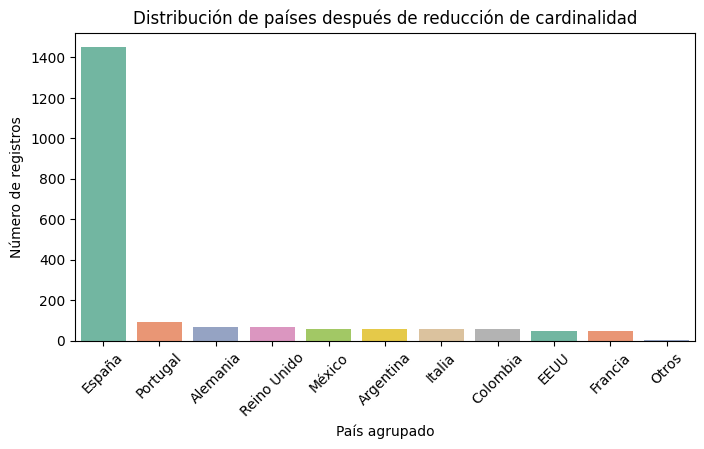

In [25]:
# Reducción de cardinalidad para los países
top_paises = df_fe["pais"].value_counts().nlargest(10).index
df_fe["pais_agrupado"] = df_fe["pais"].where(df_fe["pais"].isin(top_paises), other="Otros")

orden = df_fe["pais_agrupado"].value_counts().index

plt.figure(figsize=(8,4))
sns.countplot(x="pais_agrupado", data=df_fe, palette="Set2", order=orden)
plt.title("Distribución de países después de reducción de cardinalidad")
plt.xlabel("País agrupado")
plt.ylabel("Número de registros")
plt.xticks(rotation=45)
plt.show()

In [17]:
df_fe.head()

,edad,genero,pais,is_condicion_fisica,detalle_condicion,nivel_expereincia_previo,condicion_previa,n_acompañantes,is_camino_realizado_prev,dias,...,"motivo_Religioso, Deportivo, Cultural/turístico, Personal/reflexivo","motivo_Religioso, Deportivo, Personal/reflexivo","motivo_Religioso, Personal/reflexivo","motivo_Religioso, Personal/reflexivo, Una cosa te lleva a la otra si darte cuenta.",motivo_Turismo,pais_agrupado_España,pais_agrupado_México,pais_agrupado_Otros,pais_agrupado_Portugal,pais_agrupado_Reino Unido
0,32.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,3.0,0,5.0,...,True,False,False,False,False,True,False,False,False,False
1,32.0,Hombre,España,0,No,Avanzada (rutas largas con mochila/montaña),Media,3.0,0,5.0,...,False,False,False,False,False,True,False,False,False,False
2,32.0,Hombre,España,0,No,Moderada (10–20 km regularmente),Media,6.0,1,6.0,...,False,False,False,False,False,True,False,False,False,False
3,32.0,Mujer,Colombia,0,Migrañas tensionales,Básica (≤ 10 km ocasionalmente),Media,Desconocido,0,6.0,...,False,False,False,False,False,False,False,True,False,False
4,21.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,6.0,1,6.0,...,False,False,False,False,False,True,False,False,False,False


# 6. Guardado de datos

In [ ]:
df_fe.to_csv("F_E_Encuesta.csv", sep="\t",index=False)